In [49]:
import numpy as np
import scipy as sp
import sklearn as sk
from sklearn import svm
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import time
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve

In [50]:
def read_features(filedir, fd):
    x,y = np.fromfile(filedir+'_x.npy', dtype=np.float32), np.fromfile(filedir+'_y.npy', dtype=np.int64)
    x = x.reshape([y.shape[0],fd])
    return x,y

In [67]:
#X_train, X_test, y_train, y_test = train_test_split(X_hockey, y_hockey, test_size=0.9, random_state=3)
#X_data, y_data = read_features('./data/features/s1fc_hockey', 4096)
#X_train, y_train = read_features('../features/features/ucf_fc_hockey', 4096)
X_train, y_train = read_features('../features/features/ucf_peliculas', 4096)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)

#X_data = np.concatenate((X_data, X_data_2), axis=0)
#y_data = np.concatenate((y_data, y_data_2), axis=0)
#X_data = np.concatenate((X_data, X_data_3), axis=0)
#y_data = np.concatenate((y_data, y_data_3), axis=0)

print(X_train.shape)

(140, 4096)


In [68]:
clf = svm.LinearSVC()
train_sizes, train_scores, test_scores = learning_curve(estimator=clf, X=X_train, y=y_train, 
                                                       train_sizes=np.linspace(0.1, 1.0, 10), 
                                                       cv=5)

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

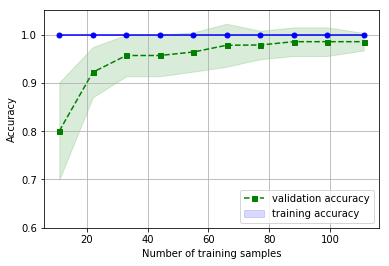

In [69]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5
#... label='training accuracy'
            )
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, 
                 alpha=0.15, color='blue', label='training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', 
         markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.6, 1.05])
plt.show()

In [32]:
scores = []
for i in range(10):
    #X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)
    
    scores.append(clf.score(X_train, y_train))
print(np.array(scores).mean())

/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
 

1.0


/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)
classifier = svm.LinearSVC()
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)
y_predict = classifier.predict(X_test)
total_0 = 0
total_1 = 0
for i in range(len(y_test)):
    if(y_predict[i] == 0 and y_test[i] == 1):
        total_0 = total_0 + 1
    if(y_predict[i] == 1 and y_test[i] == 0):
        total_1 = total_1 + 1
print(total_0, total_1)
print(classifier.score(X_test, y_test))

6 2
0.9733333333333334


/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
average_precision = metrics.average_precision_score(y_test, y_score)
recall = metrics.recall_score(y_test, y_predict)
precision = metrics.precision_score(y_test, y_predict)
print('Average precision-recall score: {0:0.4f}'.format(
      average_precision))
print('Recall %f, precision %f' % (recall, precision))

In [ ]:
target_names = ['fight', 'noFight']
print(classification_report(y_true, y_pred, target_names=target_names))

In [ ]:
X_data, y_data = read_features('./data/features/s1fc_hockey', 4096)
scores = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)
    clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
print(np.array(scores).mean())

In [ ]:
X_data, y_data = read_features('./data/features/s1m_fc_peliculas', 4096)
scores = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)
    clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
print(np.array(scores).mean())

In [ ]:
X_data, y_data = read_features('./data/features/s1m_f1000', 4096)
scores = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)
    clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
print(np.array(scores).mean())

In [ ]:
X_data, y_data = read_features('./data/features/ucf_fc_hockey', 4096)
scores = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)
    clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
print(np.array(scores).mean())

In [ ]:
X_data, y_data = read_features('./data/features/ucf_peliculas', 4096)
scores = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)
    clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
print(np.array(scores).mean())

In [ ]:
X_data, y_data = read_features('./data/features/ucf_f1000', 4096)
scores = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)
    clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))
print(np.array(scores).mean())